In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [12]:
# Load the data
data = pd.read_csv(r"F:\Climate Paper\Data\My Research Data.csv")  # Replace with your actual file

# Feature engineering: Set the 'year' as the index and ensure it's sorted
data.set_index('year', inplace=True)
data = data.sort_index()

# Scaling the data (excluding the year index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
sequence_length = 10  # Define the sequence length (lookback period)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, sequence_length)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    LSTM(50, activation='relu'),
    Dense(X.shape[2])  # Output layer matches the number of features
])
model.compile(optimizer='adam', loss='mse')

C:\Miniconda3\envs\jupyter-nb\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict on the test data
y_pred = model.predict(X_test)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.1709 - val_loss: 0.1117
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1483 - val_loss: 0.0894
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1117 - val_loss: 0.0649
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0966 - val_loss: 0.0435
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0530 - val_loss: 0.0409
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - val_loss: 0.0390
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0330 - val_loss: 0.0414
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0297 - val_loss: 0.0415
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0240 - val_loss: 0.0425
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0267 - val_loss: 0.0482
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0282 - val_loss: 0.0434
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0220 - val_loss: 0.0386


In [4]:
# Future prediction
future_steps = 50
future_input = X_test[-1]
future_predictions = []
for _ in range(future_steps):
    future_output = model.predict(future_input[np.newaxis, ...])
    future_predictions.append(future_output[0])
    future_input = np.append(future_input[1:], [future_output[0]], axis=0)

# Inverse scale the predictions
y_train_rescaled = scaler.inverse_transform(y_train)
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

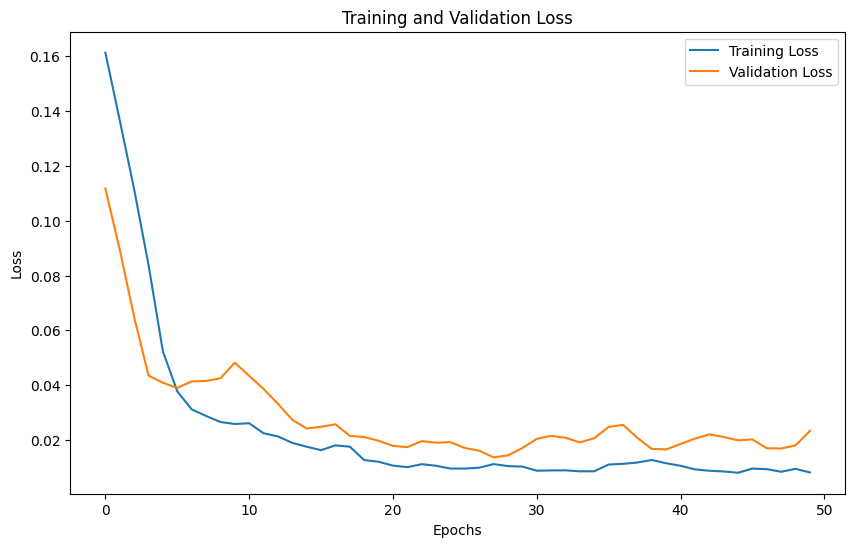

In [5]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

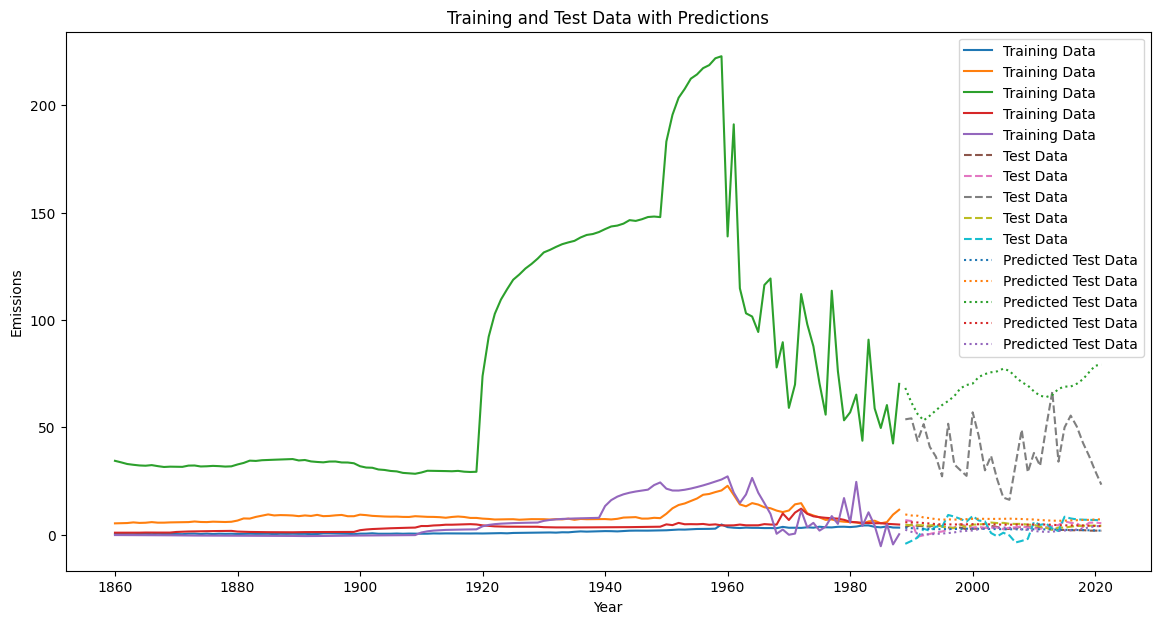

In [6]:
# Plot training and test data
train_index = data.index[sequence_length:train_size + sequence_length]
test_index = data.index[train_size + sequence_length:]
plt.figure(figsize=(14, 7))
plt.plot(train_index, y_train_rescaled, label='Training Data')
plt.plot(test_index, y_test_rescaled, label='Test Data', linestyle='dashed')
plt.plot(test_index, y_pred_rescaled, label='Predicted Test Data', linestyle='dotted')
plt.title('Training and Test Data with Predictions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

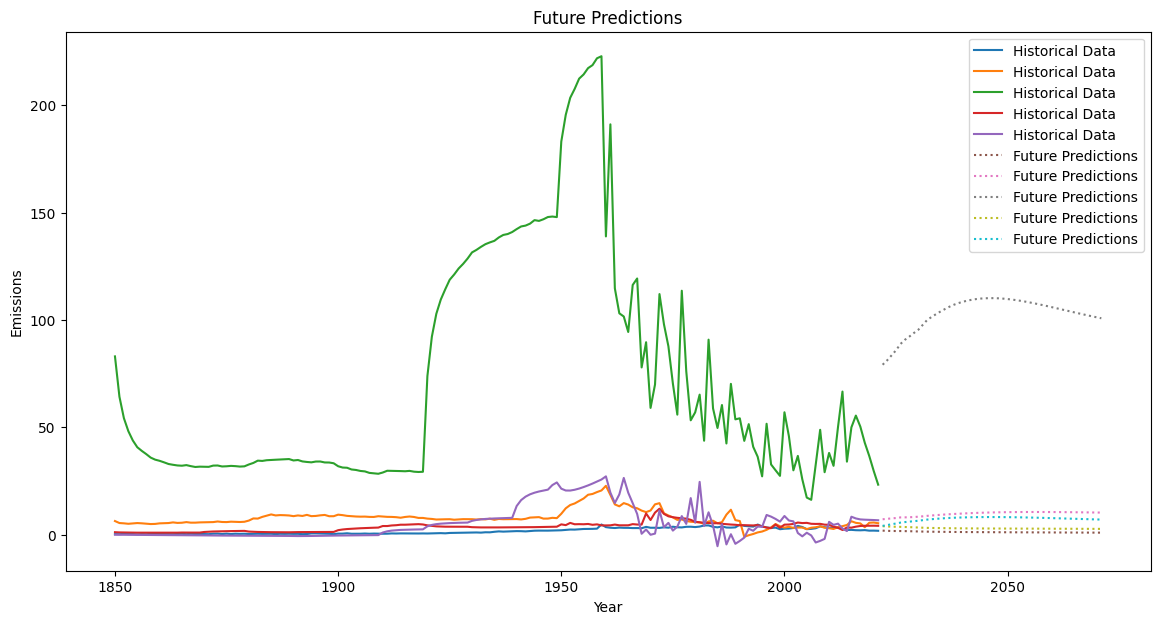

In [7]:
# Plot future predictions
future_index = pd.RangeIndex(start=data.index[-1] + 1, stop=data.index[-1] + 1 + future_steps, step=1)
plt.figure(figsize=(14, 7))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Historical Data')
plt.plot(future_index, future_predictions_rescaled, label='Future Predictions', linestyle='dotted')
plt.title('Future Predictions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

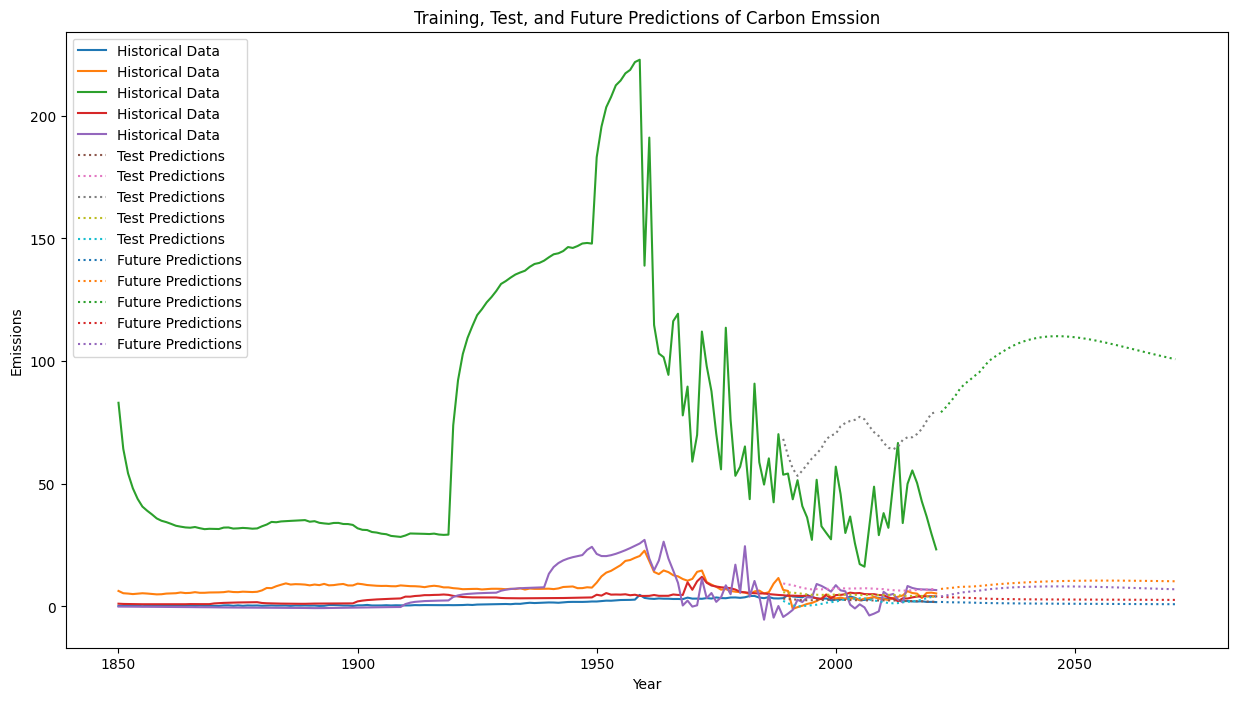

In [10]:
# Combined training, test, and future predictions plot
plt.figure(figsize=(15, 8))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Historical Data')
plt.plot(test_index, y_pred_rescaled, label='Test Predictions', linestyle='dotted')
plt.plot(future_index, future_predictions_rescaled, label='Future Predictions', linestyle='dotted')
plt.title('Training, Test, and Future Predictions of Carbon Emssion')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()